In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#kod satırı Jupyter Notebook'a IDE'sine özel olarak yazılmış bir kod satırıdır. Bu kod satırı oluşturulan görselleri görmek için her defasında “plt.show()” satırını yazmayı önlüyor başka IDE'ler de çalışıyorsanız her defasında plt.show() yazmak gerekebilir.

In [2]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])
print(np.shape(X))

(4, 2)


In [3]:
num_input = 2
num_hidden = 5
num_output = 1

In [6]:
Wxh = np.random.randn(num_input,num_hidden)
print(Wxh)
bh = np.zeros((1,num_hidden))


[[ 1.59920326  0.00344745 -1.25338253 -0.55145723 -0.0048261 ]
 [ 0.44043254 -1.50056345  1.0741207   0.52643556  0.42313882]]


In [7]:
Why = np.random.randn (num_hidden,num_output)
print(Why)
by = np.zeros((1,num_output))


[[-0.60236654]
 [ 0.16214038]
 [-1.33474827]
 [ 0.44096928]
 [ 1.13264757]]


In [8]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))


In [9]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


In [10]:
def forward_prop(X,Wxh,Why,bh,by):
    z1 = np.dot(X,Wxh) + bh   # shape 4 x 5
    a1 = sigmoid(z1)          # shape 4 x 5
    z2 = np.dot(a1,Why) + by  # shape 4 x 1
    y_hat = sigmoid(z2)       # shape 4 x 1
    return z1,a1,z2,y_hat

In [11]:
def backword_prop(y,y_hat, z1, a1, z2,Why):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2)) # shape 4 x 1
    dJ_dWhy = np.dot(a1.T, delta2)                          # shape 5 x 1
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)    # shape 4 x 5 
    dJ_dWxh = np.dot(X.T, delta1)                           # shape 2 x 5
    return dJ_dWxh, dJ_dWhy


In [12]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

In [16]:
alpha = 0.01  # learning rate
num_iterations = 50000


In [17]:
cost =[]
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why,bh,by) 
    dJ_dWxh, dJ_dWhy = backword_prop(y,y_hat, z1, a1, z2,Why)
    #print(dJ_dWxh,dJ_dWhy)
    #update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
 
    #print(y-y_hat)
    #compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Text(0, 0.5, 'Cost')

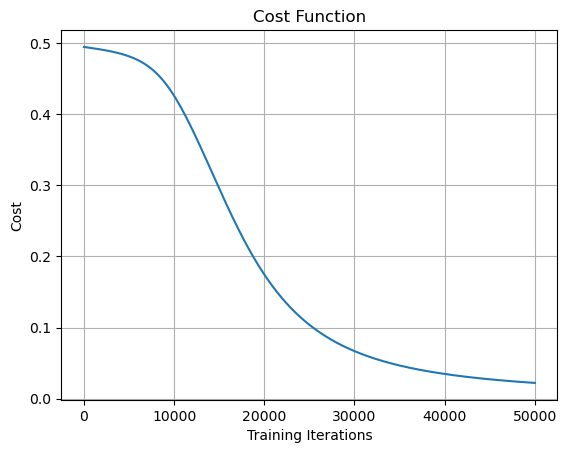

In [18]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
